In [3]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt

with open('C:/Users/jchin/Desktop/stock_analysis/bitcoindata.csv', 'rb') as f:
    result = chardet.detect(f.read())  #  format encoding

df=pd.read_csv("C:/Users/jchin/Desktop/stock_analysis/bitcoindata.csv",
                encoding=result['encoding'],index_col='Timestamp',parse_dates=True)

df.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,
2015-10-26 00:00:00,276.3,280.009,273.938,277.022,894.97,248012.1,277.12
2015-10-26 06:00:00,277.492,281.797,275.053,277.7,1918.73,533633.87,278.12
2015-10-26 12:00:00,277.543,280.939,276.997,279.615,1552.59,433522.36,279.23
2015-10-26 18:00:00,279.615,281.986,277.8,281.854,1564.43,437211.45,279.47
2015-10-27 00:00:00,281.985,287.604,281.101,286,3326.44,947440.82,284.82


In [4]:
#df.iloc[:,6].dtype()
#df["Weighted Price"]=df["Weighted Price"].astype(float)
#df["Weighted Price"].plot(grid = True)
print(df.dtypes)
df.High.isnull()
# df['High'] = df.High.astype(float)
# df=df.str.replace('—','fck')
df = df[df.Low != '—']


Open                 object
High                 object
Low                  object
Close                object
Volume (BTC)         object
Volume (Currency)    object
Weighted Price       object
dtype: object


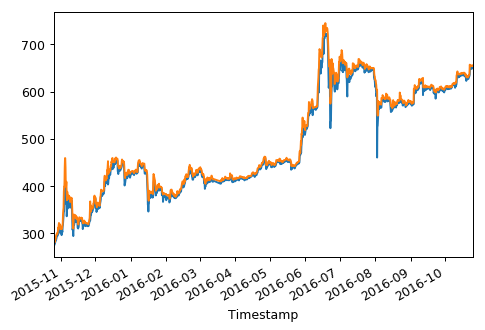

In [66]:
# df.iloc[562]
# df.dtypes
df['Low'] = df.Low.astype(float)
df['High'] = df.High.astype(float)
# df.dtypes
# # type(df['Low'])
plt.rcParams['figure.dpi']= 90
plt.plot(df['Low'])
df['High'].plot()


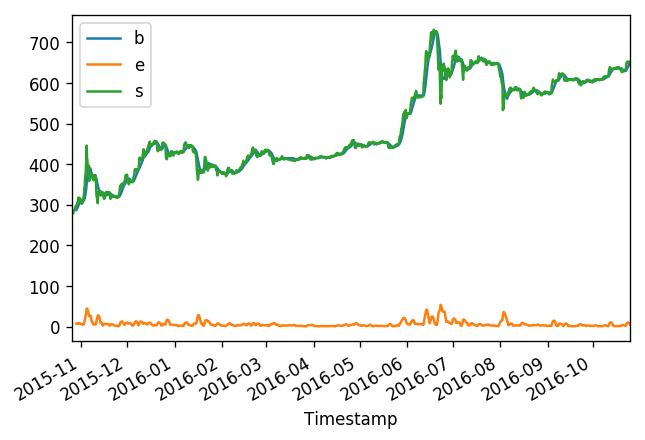

In [36]:
df['Weighted Price'] = df['Weighted Price'].astype(float)
time_series = df['Weighted Price']
time_series.rolling(12).mean().plot(label='Rolling Mean')
time_series.rolling(12).std().plot(label='Rolling STD')
time_series.plot()
plt.legend('best')
plt.show()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose


C:\Users\jchin\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


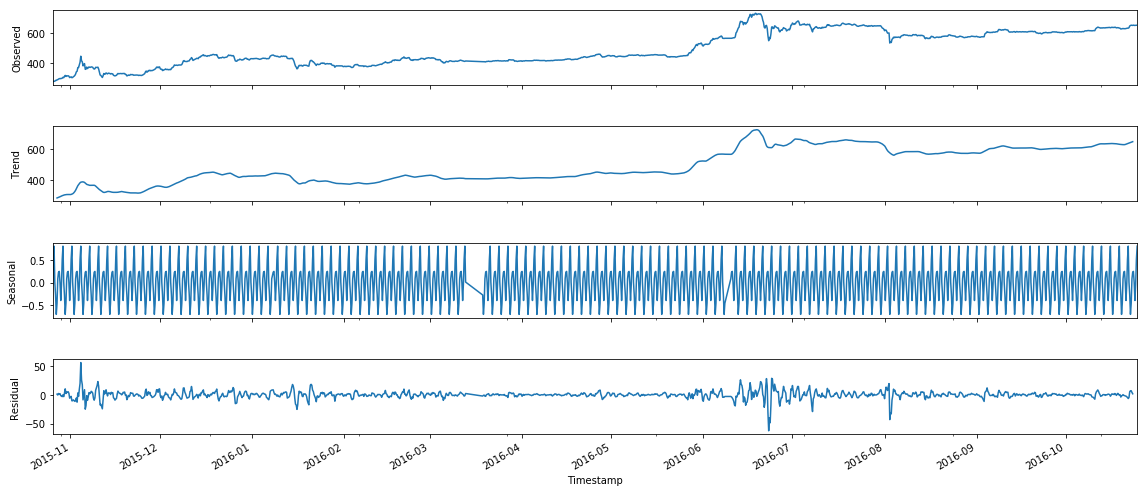

In [43]:
%matplotlib inline
decomp = seasonal_decompose(time_series,freq=12)
fig = decomp.plot()
fig.set_size_inches(18,8)


In [18]:
from statsmodels.tsa.stattools import adfuller

In [26]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12, center = False).mean()
    rolstd = timeseries.rolling(window=12, center = False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

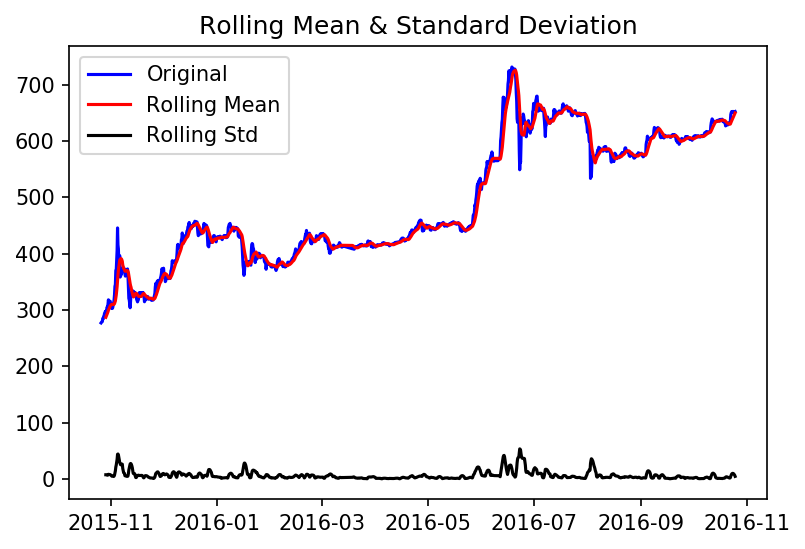

Results of Dickey-Fuller Test:
Test Statistic                   -1.354219
p-value                           0.604017
#Lags Used                       10.000000
Number of Observations Used    1420.000000
Critical Value (1%)              -3.434963
Critical Value (5%)              -2.863578
Critical Value (10%)             -2.567855
dtype: float64


In [27]:
plt.rcParams['figure.dpi']= 150
test_stationarity(time_series)


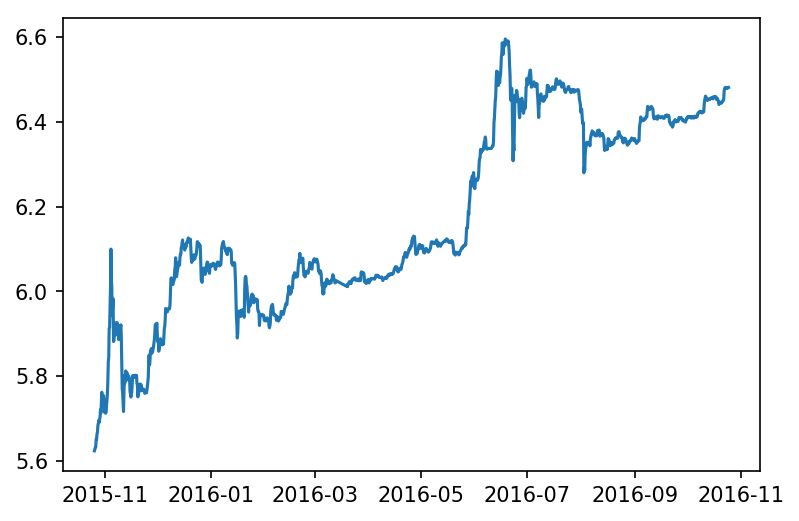

In [28]:
ts_log = np.log(time_series)
plt.plot(ts_log)

C:\Users\jchin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


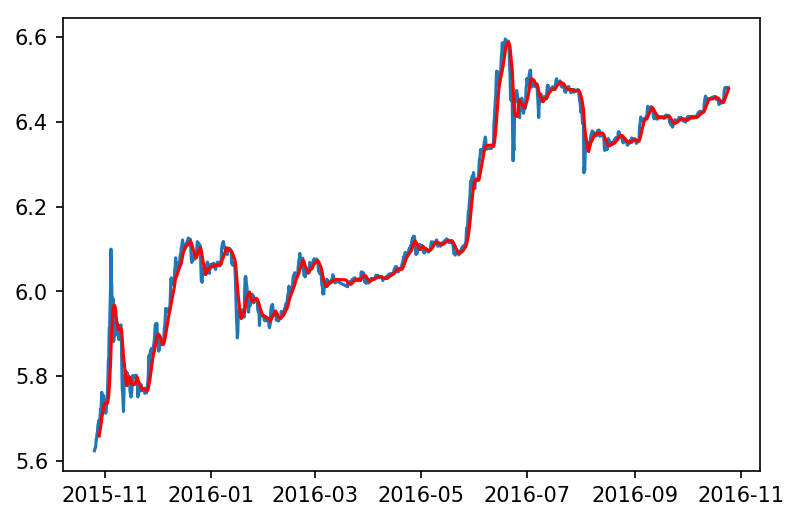

In [50]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [51]:
# Subtract rolling mean from the original series
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Timestamp
2015-10-26 00:00:00         NaN
2015-10-26 06:00:00         NaN
2015-10-26 12:00:00         NaN
2015-10-26 18:00:00         NaN
2015-10-27 00:00:00         NaN
2015-10-27 06:00:00         NaN
2015-10-27 12:00:00         NaN
2015-10-27 18:00:00         NaN
2015-10-28 00:00:00         NaN
2015-10-28 06:00:00         NaN
2015-10-28 12:00:00         NaN
2015-10-28 18:00:00    0.031848
Name: Weighted Price, dtype: float64

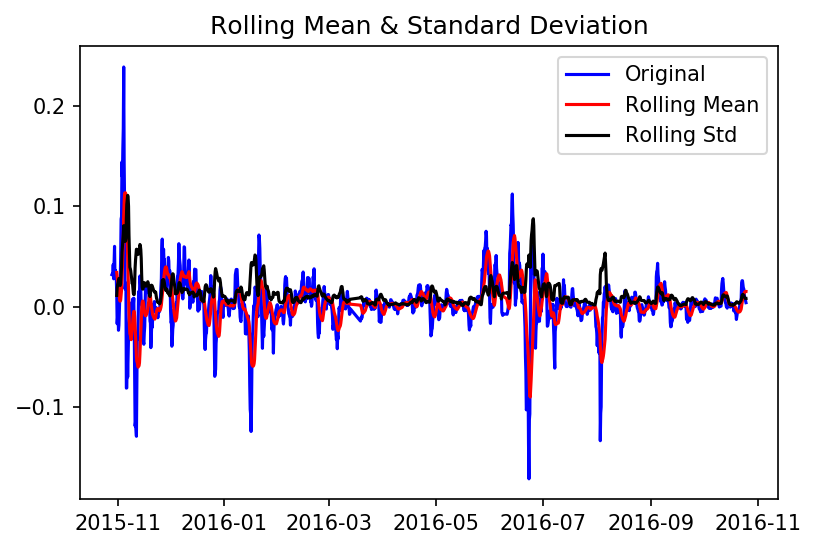

Results of Dickey-Fuller Test:
Test Statistic                -7.917892e+00
p-value                        3.792745e-12
#Lags Used                     2.300000e+01
Number of Observations Used    1.396000e+03
Critical Value (1%)           -3.435043e+00
Critical Value (5%)           -2.863613e+00
Critical Value (10%)          -2.567873e+00
dtype: float64


In [52]:
# Remove nan and test stationary
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\jchin\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


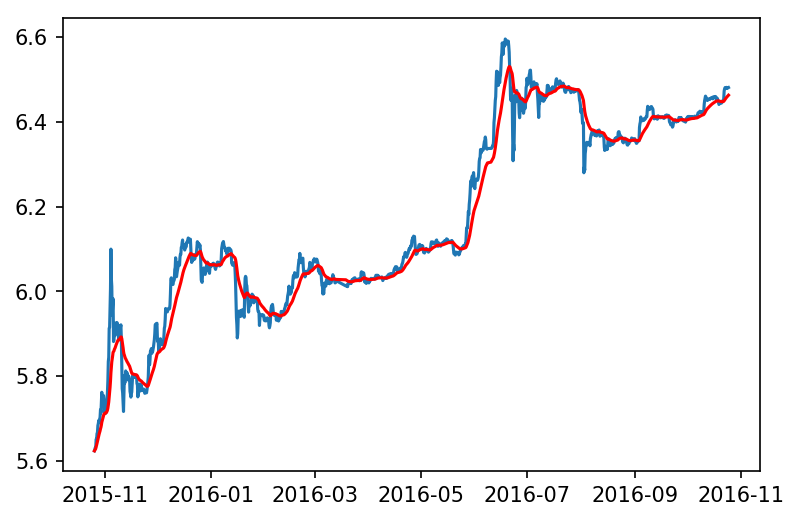

In [53]:
# Weighted average mean
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [54]:
ts_log_ewma_diff = ts_log - expwighted_avg
ts_log_ewma_diff.head(12)

Timestamp
2015-10-26 00:00:00    0.000000
2015-10-26 06:00:00    0.001749
2015-10-26 12:00:00    0.003710
2015-10-26 18:00:00    0.003326
2015-10-27 00:00:00    0.017302
2015-10-27 06:00:00    0.013447
2015-10-27 12:00:00    0.022605
2015-10-27 18:00:00    0.021525
2015-10-28 00:00:00    0.032719
2015-10-28 06:00:00    0.032527
2015-10-28 12:00:00    0.035176
2015-10-28 18:00:00    0.026924
Name: Weighted Price, dtype: float64

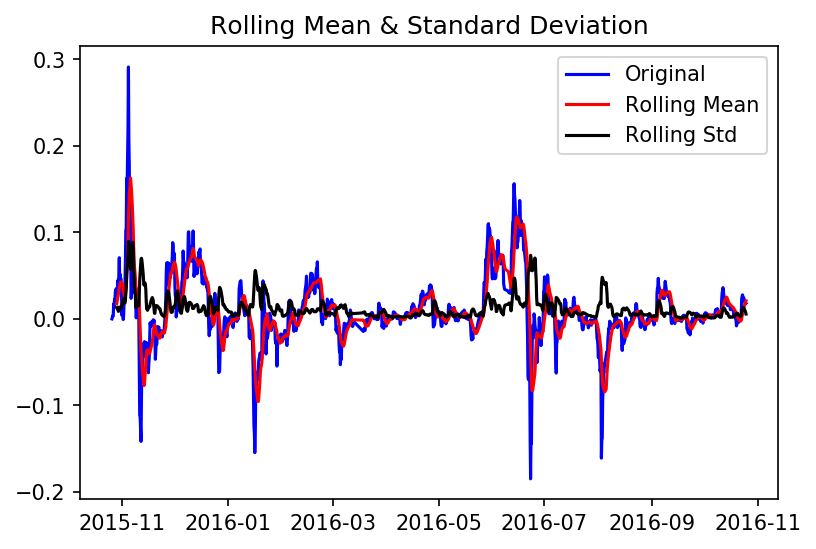

Results of Dickey-Fuller Test:
Test Statistic                -6.339932e+00
p-value                        2.770765e-08
#Lags Used                     5.000000e+00
Number of Observations Used    1.425000e+03
Critical Value (1%)           -3.434947e+00
Critical Value (5%)           -2.863570e+00
Critical Value (10%)          -2.567851e+00
dtype: float64


In [56]:
# There is no nan
test_stationarity(ts_log_ewma_diff)

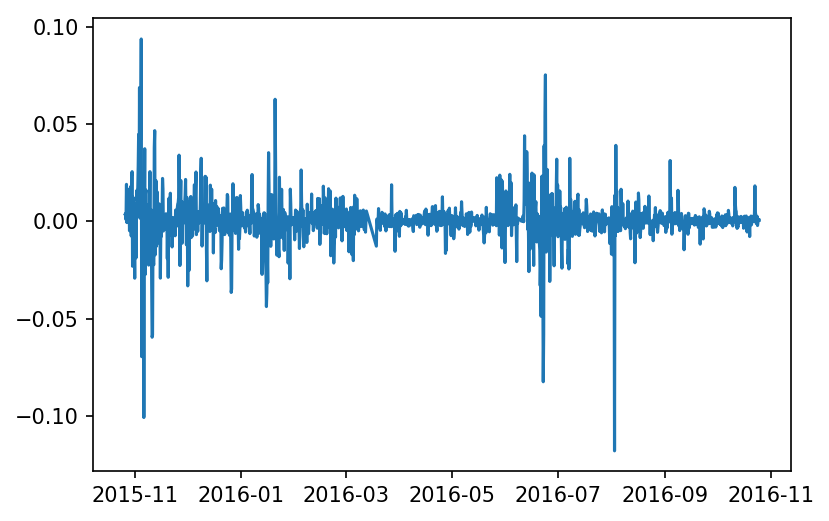

In [57]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [58]:
ts_log_diff.head()


Timestamp
2015-10-26 00:00:00         NaN
2015-10-26 06:00:00    0.003602
2015-10-26 12:00:00    0.003983
2015-10-26 18:00:00    0.000859
2015-10-27 00:00:00    0.018962
Name: Weighted Price, dtype: float64

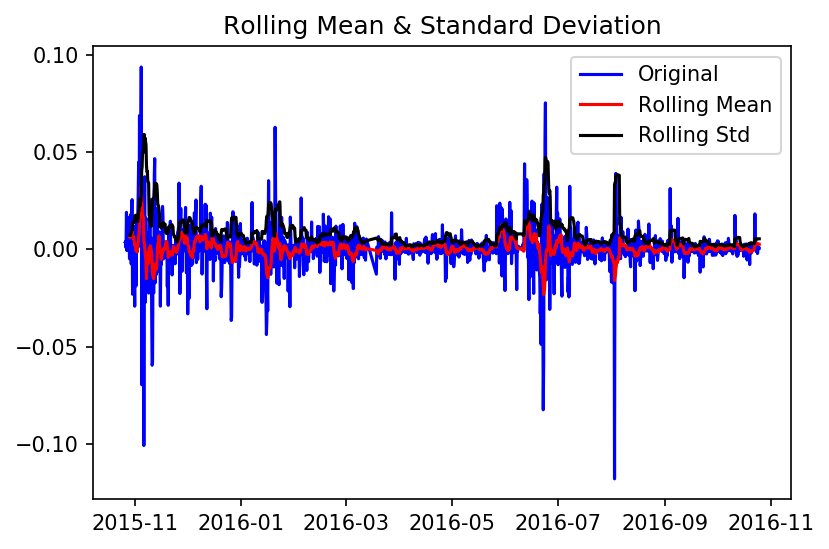

Results of Dickey-Fuller Test:
Test Statistic                -1.717826e+01
p-value                        6.673247e-30
#Lags Used                     4.000000e+00
Number of Observations Used    1.425000e+03
Critical Value (1%)           -3.434947e+00
Critical Value (5%)           -2.863570e+00
Critical Value (10%)          -2.567851e+00
dtype: float64


In [59]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

C:\Users\jchin\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


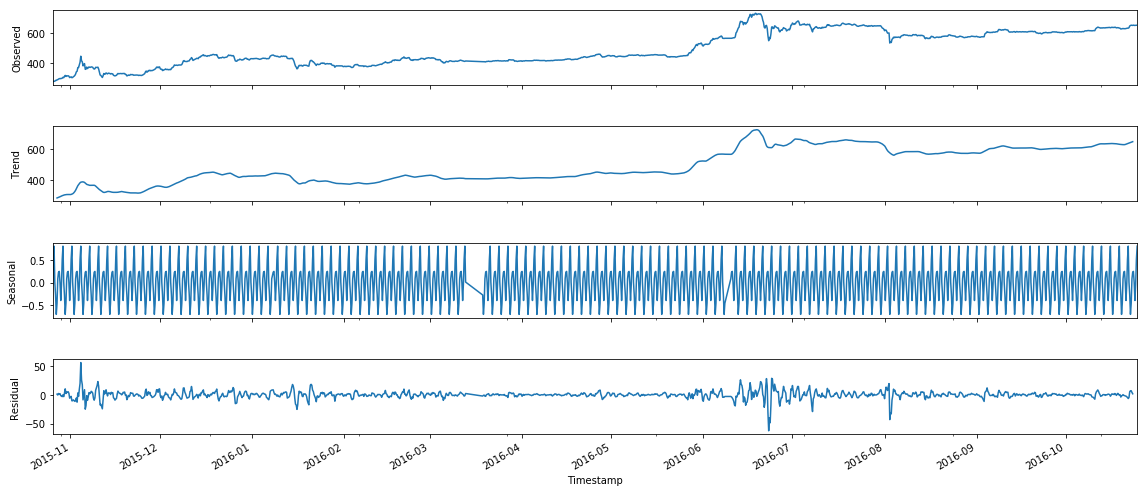

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
decomp = seasonal_decompose(time_series,freq=12)
fig = decomp.plot()
fig.set_size_inches(18,8)

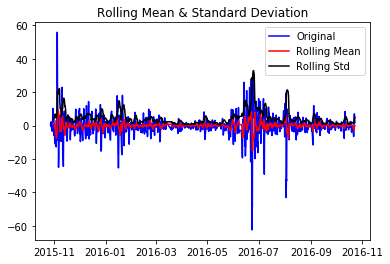

Results of Dickey-Fuller Test:
Test Statistic                -1.394533e+01
p-value                        4.808896e-26
#Lags Used                     1.800000e+01
Number of Observations Used    1.400000e+03
Critical Value (1%)           -3.435030e+00
Critical Value (5%)           -2.863607e+00
Critical Value (10%)          -2.567870e+00
dtype: float64


In [63]:
residual = decomp.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)